In [2]:
import numpy as np
import pandas as pd

sand = pd.read_csv('230509 sand test after preprocessing to the end.csv')



In [3]:
print(sand.shape)
sand

(822692, 43)


,Time2,Time,Source.Name,y,color,"Q_liq, BPD","Q,m3d","Q,avg","Q_gas, lbm/min","P_in, psi",...,"Vib, out","Vib, out2",Vo_ms,Gas_Temp,"Vib, middle","Vib, middle2",Vmd_ms,Fluid_temp,Bearing_temp,Winding_temp
0,0.000278,1,07182022_sand test,0,1000000,2593.381,412.088241,412.088241,0.0,-6.010,...,0.029,0.28449,284.403,18.410,0.023,0.22563,225.561,19.455,197.586,30.141
1,0.000556,2,07182022_sand test,0,1000000,2597.466,412.737347,412.412794,0.0,-6.014,...,0.029,0.28449,284.403,18.409,0.023,0.22563,225.561,19.458,197.585,29.400
2,0.000833,3,07182022_sand test,0,1000000,2598.315,412.872253,412.804800,0.0,-6.013,...,0.029,0.28449,284.403,18.409,0.023,0.22563,225.561,19.556,197.589,29.745
3,0.001111,4,07182022_sand test,0,1000000,2594.207,412.219492,412.545873,0.0,-6.013,...,0.029,0.28449,284.403,18.407,0.023,0.22563,225.561,19.511,197.588,30.159
4,0.001389,5,07182022_sand test,0,1000000,2593.730,412.143697,412.181595,0.0,-6.014,...,0.029,0.28449,284.403,18.412,0.023,0.22563,225.561,19.453,197.586,30.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822687,228.524444,822688,09302022_sand test_1506,1,1000000,1161.851,184.618124,178.037678,0.0,0.506,...,0.031,0.30411,304.017,6.443,0.021,0.20601,205.947,20.344,32.949,23.741
822688,228.524722,822689,09302022_sand test_1506,1,1000000,1173.274,186.433239,185.525681,0.0,0.501,...,0.031,0.30411,304.017,9.582,0.020,0.19620,196.140,20.355,32.949,23.843
822689,228.525000,822690,09302022_sand test_1506,1,1000000,1179.460,187.416194,186.924716,0.0,0.637,...,0.029,0.28449,284.403,0.028,0.021,0.20601,205.947,20.345,32.943,23.553
822690,228.525278,822691,09302022_sand test_1506,1,1000000,1175.660,186.812374,187.114284,0.0,0.498,...,0.031,0.30411,304.017,9.474,0.020,0.19620,196.140,20.347,32.947,23.868


In [4]:
labels = ['Normal', "Failure"]

sand.head()

,Time2,Time,Source.Name,y,color,"Q_liq, BPD","Q,m3d","Q,avg","Q_gas, lbm/min","P_in, psi",...,"Vib, out","Vib, out2",Vo_ms,Gas_Temp,"Vib, middle","Vib, middle2",Vmd_ms,Fluid_temp,Bearing_temp,Winding_temp
0,0.000278,1,07182022_sand test,0,1000000,2593.381,412.088241,412.088241,0.0,-6.010,...,0.029,0.28449,284.403,18.410,0.023,0.22563,225.561,19.455,197.586,30.141
1,0.000556,2,07182022_sand test,0,1000000,2597.466,412.737347,412.412794,0.0,-6.014,...,0.029,0.28449,284.403,18.409,0.023,0.22563,225.561,19.458,197.585,29.400
2,0.000833,3,07182022_sand test,0,1000000,2598.315,412.872253,412.804800,0.0,-6.013,...,0.029,0.28449,284.403,18.409,0.023,0.22563,225.561,19.556,197.589,29.745
3,0.001111,4,07182022_sand test,0,1000000,2594.207,412.219492,412.545873,0.0,-6.013,...,0.029,0.28449,284.403,18.407,0.023,0.22563,225.561,19.511,197.588,30.159
4,0.001389,5,07182022_sand test,0,1000000,2593.730,412.143697,412.181595,0.0,-6.014,...,0.029,0.28449,284.403,18.412,0.023,0.22563,225.561,19.453,197.586,30.066


In [5]:
# 1st sp_data = sp[['Date', 'Pin, psi', 'Pdis, psi', 'L_sep, in', 'P_sep, psi', 'Acoustic', 'T_m_suf', 'V_in, gmrs', 'V_o, gmrs', 'V_m gmrs', 
#               'T_bearing', 'T_winding', 'label']]
sand_data = sand[['Time2', 'y','color','Q,m3d', 'Pin_mpa', 'Pout_mpa',  
                  'Horizon_DP','Vertical_DP', 'Acoustic', 'Motor temp', 'Vib,motor2', 'Vib, out2', 
               'Vib, middle2', 'Winding_temp']]
sand_data.head()


,Time2,y,color,"Q,m3d",Pin_mpa,Pout_mpa,Horizon_DP,Vertical_DP,Acoustic,Motor temp,"Vib,motor2","Vib, out2","Vib, middle2",Winding_temp
0,0.000278,0,1000000,412.088241,1.198351,4.808297,100.129190,105.134960,0.243,25.245,0.41202,0.28449,0.22563,30.141
1,0.000556,0,1000000,412.737347,1.197799,4.663916,100.218825,104.983270,0.243,25.247,0.41202,0.28449,0.22563,29.400
2,0.000833,0,1000000,412.872253,1.197937,4.710940,100.225720,104.886740,0.243,25.249,0.40221,0.28449,0.22563,29.745
3,0.001111,0,1000000,412.219492,1.197937,4.708044,100.260195,105.072905,0.243,25.248,0.41202,0.28449,0.22563,30.159
4,0.001389,0,1000000,412.143697,1.197799,4.488783,100.267090,104.907425,0.244,25.246,0.40221,0.28449,0.22563,30.066


In [6]:
# x, y
#input_x = shifted_df.drop('y', axis=1)
# input_x = sand_data.drop(['Time', 'y'], axis = 1).values
# input_y = sand_data['y'].values

# train_normal = sand_data[:773200]
input_x = sand_data.drop(['Time2', 'y', 'color'], axis = 1).values
input_y = sand_data['y'].values

n_features = input_x.shape[1]
input_y.shape

(822692,)

In [7]:
def temporalize(X, y, timesteps):
	output_X = []
	output_y = []
	for i in range(len(X) - timesteps - 1):
		t = []
		for j in range(1, timesteps + 1):
			# Gather the past records upto the lookback period
			t.append(X[[(i + j + 1)], :])
		output_X.append(t)
		output_y.append(y[i + timesteps + 1])
	return np.squeeze(np.array(output_X)), np.array(output_y)
timesteps = 2

# Temporalize
x, y = temporalize(input_x, input_y, timesteps)
print(x.shape) # (772602, 30, 16)

(822689, 2, 11)


In [1]:
from sklearn.model_selection import train_test_split
# Split into train, valid, and test 
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = seed)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state = seed)

print(len(x_train))  # 11691
print(len(x_valid))  # 2923
print(len(x_test))   # 3654
print(len(y_valid))

NameError: name 'x' is not defined

In [ ]:
x_train_y0 = x_train[y_train == 0]
x_train_y1 = x_train[y_train == 1]

x_valid_y0 = x_valid[y_valid == 0]
x_valid_y1 = x_valid[y_valid == 1]

print(len(x_train_y0))
print(len(x_train_y1))
print(len(x_valid_y0))
print(len(x_valid_y1))

In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler

def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

def scale(X, scaler):
    for i in range(X.shape[0]):
        X[i, :, :] = scaler.transform(X[i, :, :])
        
    return X
scaler = RobustScaler().fit(flatten(x_train_y0))

x_train_y0_scaled = scale(x_train_y0, scaler)
x_valid_scaled = scale(x_valid, scaler)
x_valid_y0_scaled = scale(x_valid_y0, scaler)
x_test_scaled = scale(x_test, scaler)

NameError: name 'x_train_y0' is not defined

In [3]:
from tensorflow.keras import Model, models, layers, optimizers, regularizers

epochs = 300
batch = 32
lr = 0.001 ##########
# 학습률은 0.00001 부터 10씩 곱해가면서 하고 배치사이즈는 32가 이상적인 숫자라함. 이에 대한 근거를 대던지, 나중에
# 그리드 서칭을 하던지 해야할듯.
lstm_ae = models.Sequential()
# Encoder
lstm_ae.add(layers.LSTM(8, activation='relu', input_shape=(timesteps, n_features), return_sequences=True)) # what is n_feature ?
# lstm_ae.add(layers.LSTM(4, activation='relu', return_sequences=True))
lstm_ae.add(layers.LSTM(4, activation='relu', return_sequences=False))
#lstm_ae.add(layers.LSTM(32, activation='relu', return_sequences=False))
#lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
#lstm_ae.add(layers.LSTM(8, activation='relu', return_sequences=False))
lstm_ae.add(layers.RepeatVector(timesteps))
# Decoder
#lstm_ae.add(layers.LSTM(8, activation='relu', return_sequences=True))
#lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
lstm_ae.add(layers.LSTM(4, activation='relu', return_sequences=True))
lstm_ae.add(layers.LSTM(8, activation='relu', return_sequences=True))
# lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
#lstm_ae.add(layers.LSTM(128, activation='relu', return_sequences=True))
lstm_ae.add(layers.TimeDistributed(layers.Dense(n_features)))

lstm_ae.summary()

NameError: name 'timesteps' is not defined

In [ ]:
### from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# compile
lstm_ae.compile(loss='mse', optimizer=optimizers.Adam(lr))

callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)
# fit
history = lstm_ae.fit(x_train_y0_scaled, x_train_y0_scaled,
                     epochs=epochs, batch_size=batch, callbacks = callbacks,
                     validation_data=(x_valid_y0_scaled, x_valid_y0_scaled))

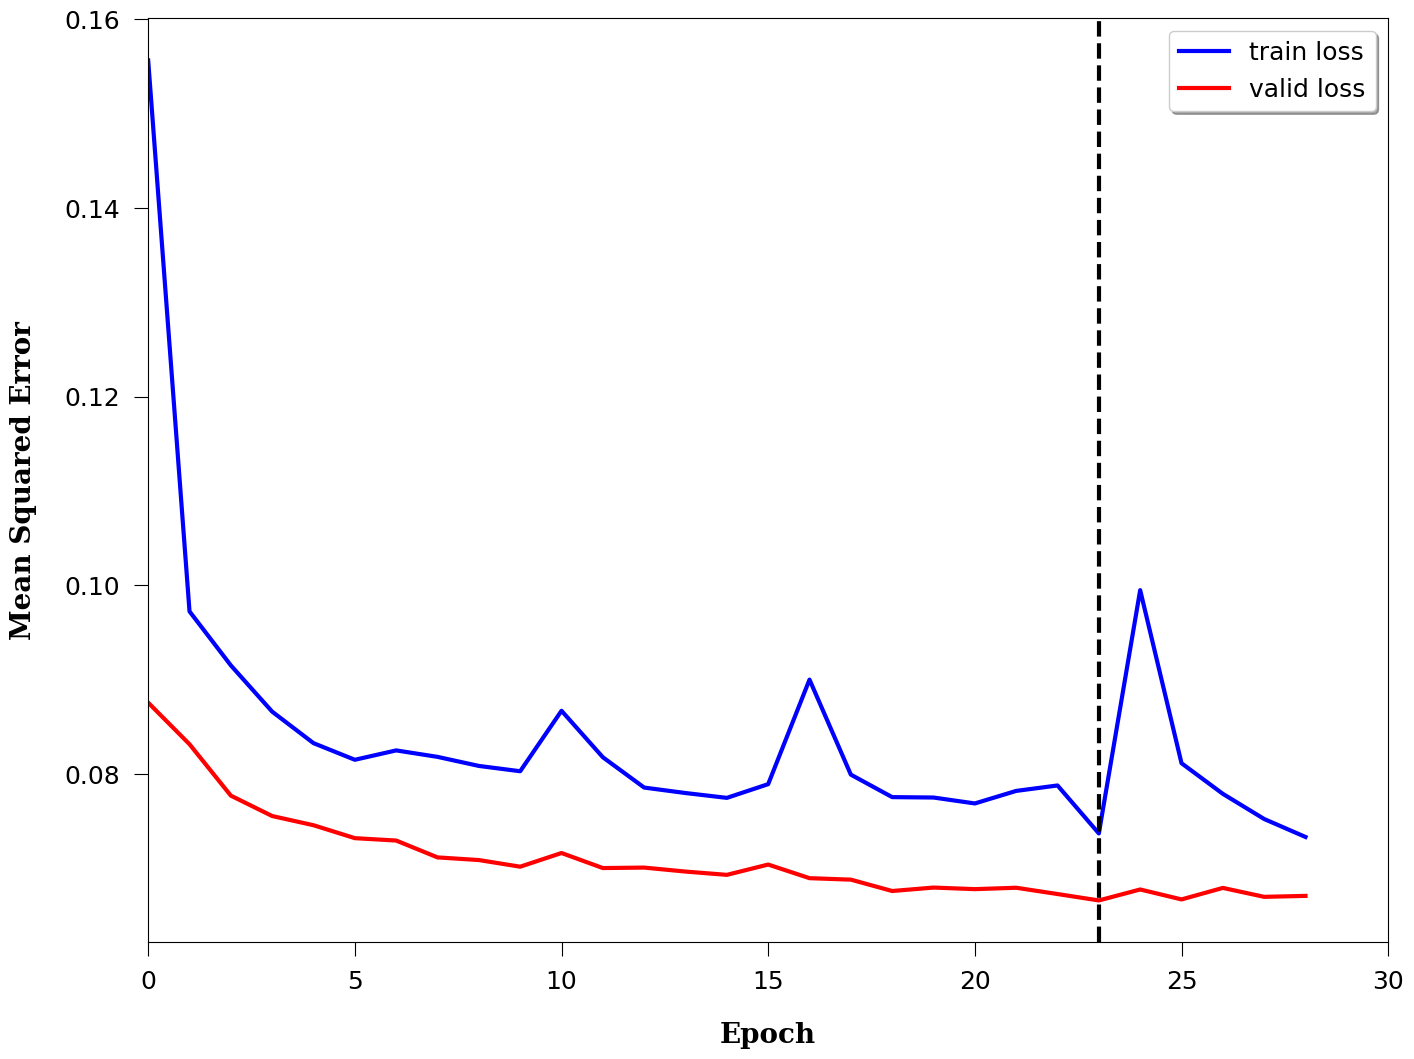

In [38]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16,12)

plt.plot(history.history['loss'],color = "blue", linewidth = 3, linestyle = 'solid', label='train loss')
plt.plot(history.history['val_loss'], color = "red", linewidth = 3, linestyle = 'solid', label='valid loss')
plt.tick_params(axis = 'x', labelsize = 18, pad = 10, length = 10)
plt.tick_params(axis = 'y', labelsize = 18, pad = 10, length = 10)

plt.xlabel('Epoch', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.ylabel('Mean Squared Error', fontsize = 20, labelpad = 20, fontdict={'family': 'serif', 'weight': 'bold'})
plt.xlim(0,30)
plt.axvline(23, 0, 1, color='black', linestyle='--', linewidth=3)
# plt.xticks([1,5,10,15,20,25,30])

plt.legend(loc='best', ncol=1, fontsize=18, frameon=True, shadow=True, labelspacing = .5) #edgecolor = 'green',
plt.show()

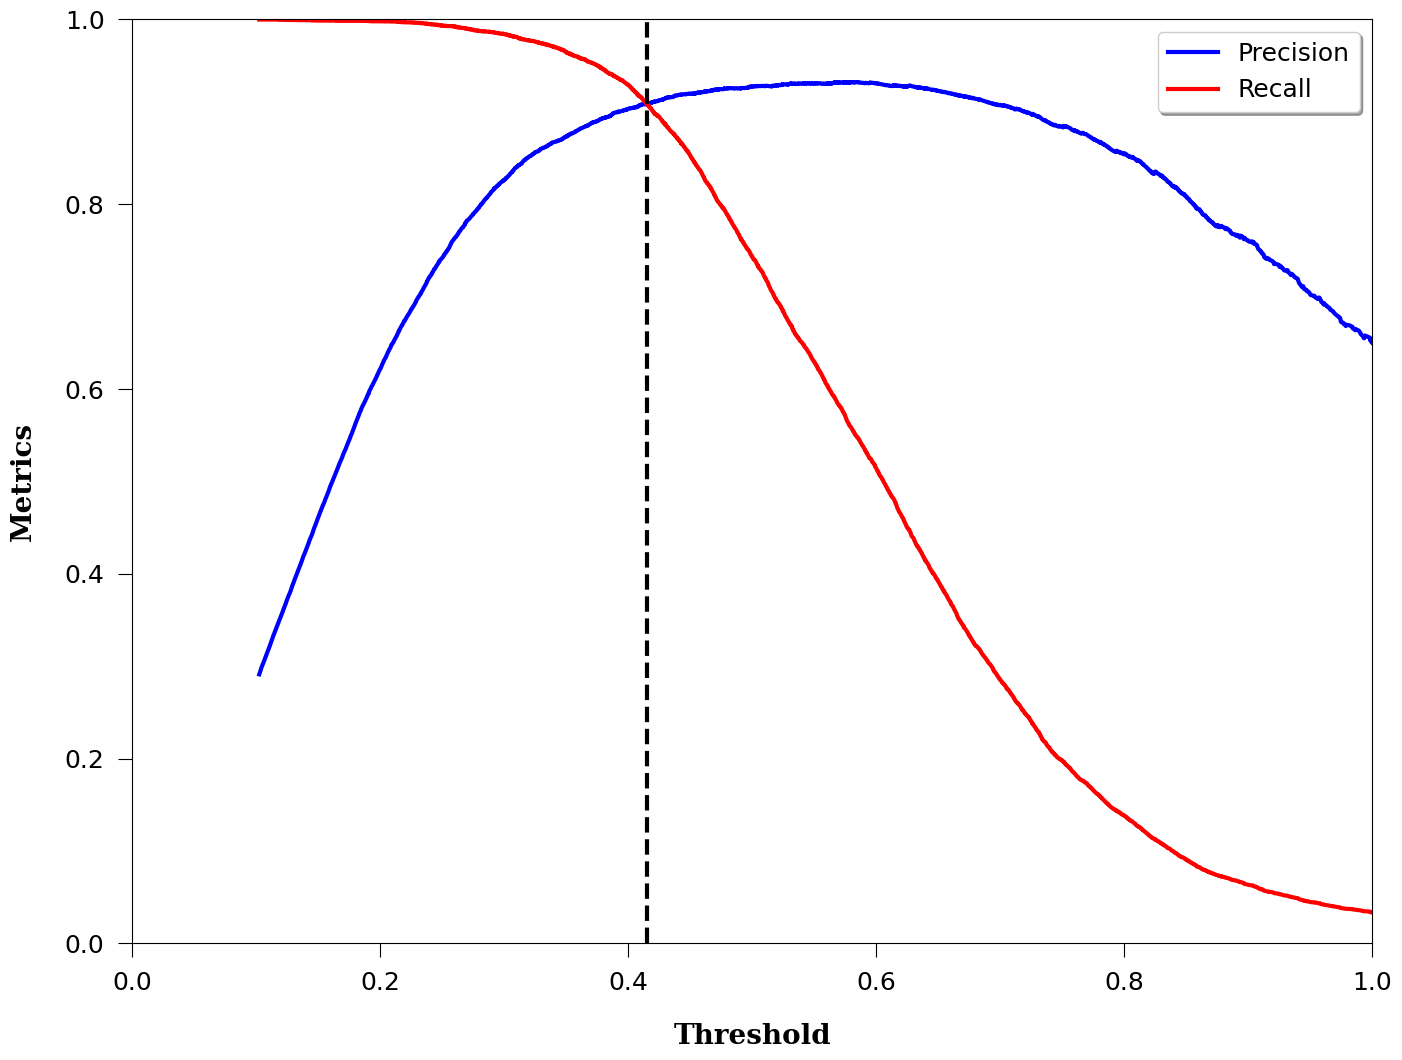

In [46]:
from sklearn import metrics

valid_x_predictions = lstm_ae.predict(x_valid_scaled)
mse = np.mean(np.power(flatten(x_valid_scaled) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error':mse, 
                         'True_class':list(y_valid)})
precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error'])

plt.figure(figsize=(16,12))
plt.plot(threshold_rt, precision_rt[1:],color = "blue", linewidth = 3, linestyle = 'solid', label='Precision')
plt.plot(threshold_rt, recall_rt[1:],color = "red", linewidth = 3, linestyle = 'solid',label='Recall')
plt.xlabel('Threshold', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.ylabel('Metrics', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.tick_params(axis = 'x', labelsize = 18, pad = 10, length = 10)
plt.tick_params(axis = 'y', labelsize = 18, pad = 10, length = 10)
plt.axvline(0.41508550970007557, 0, 1, color='black', linestyle='--', linewidth=3)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc='best', ncol=1, fontsize=18, frameon=True, shadow=True, labelspacing = .5)
plt.show()

In [15]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)

precision:  0.9087820835430297 , recall:  0.9087820835430297
threshold:  0.41508550970007557


<Figure size 1600x1200 with 0 Axes>

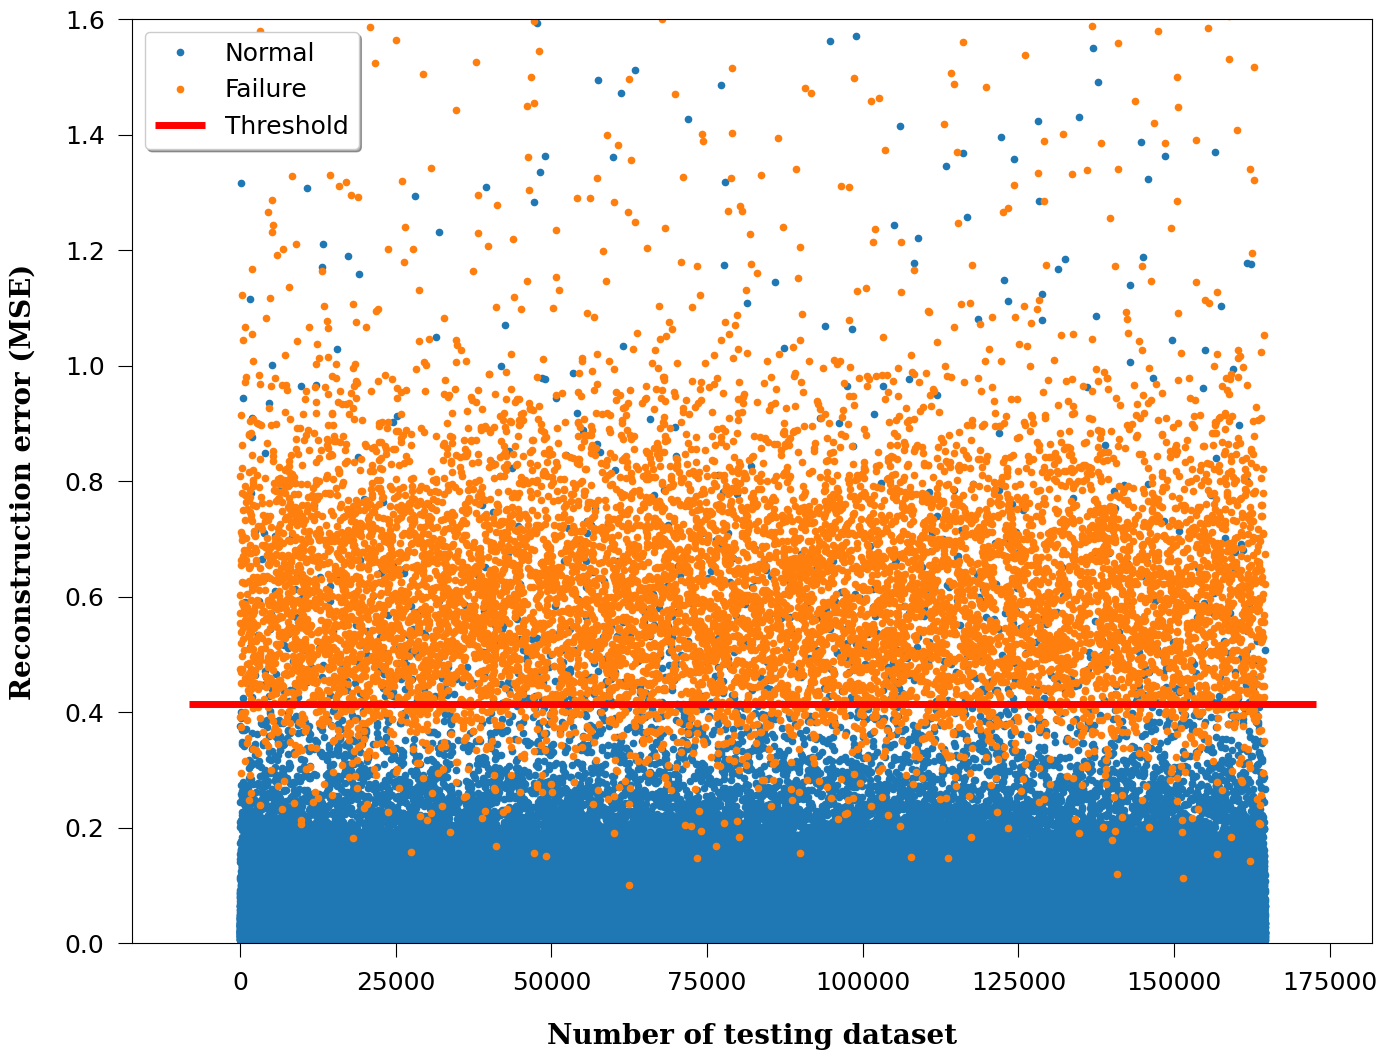

In [65]:
test_x_predictions = lstm_ae.predict(x_test_scaled)
mse = np.mean(np.power(flatten(x_test_scaled) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': y_test.tolist()})

groups = error_df.groupby('True_class')
plt.figure(figsize=(16,12))

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=4.5, linestyle='',
            label = "Failure" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", linewidth = 5, zorder=100, label='Threshold')
ax.legend(loc='best', ncol=1, fontsize=18, frameon=True, shadow=True, labelspacing = .5)
ax.set_ylabel("Reconstruction error (MSE)", fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
ax.set_xlabel("Number of testing dataset", fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
ax.tick_params(axis = 'x', labelsize = 18, pad = 10, length = 10)
ax.tick_params(axis = 'y', labelsize = 18, pad = 10, length = 10)
ax.set_ylim([0,1.6])
# plt.title("Reconstruction error for different classes")


# plt.ylabel("Reconstruction error", fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
# plt.xlabel("Data point index", fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})

# plt.tick_params(axis = 'x', labelsize = 18, pad = 10, length = 10)
# plt.tick_params(axis = 'y', labelsize = 18, pad = 10, length = 10)

# plt.legend(loc='best', ncol=1, fontsize=18, frameon=True, shadow=True, labelspacing = .5)

plt.show();

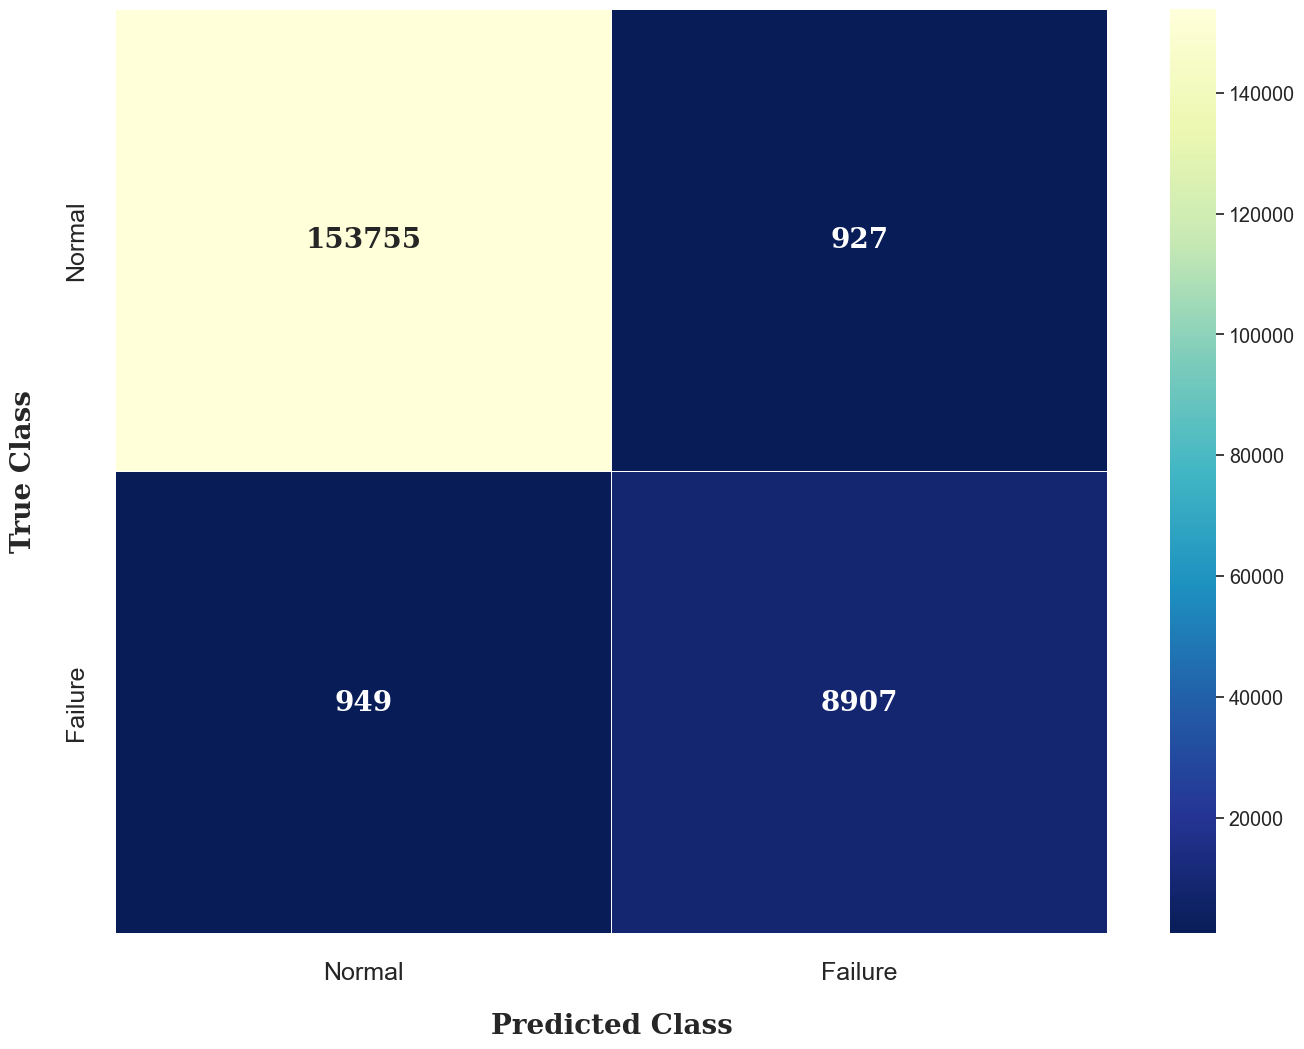

In [106]:
import seaborn as sns

# classification by threshold
pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)
plt.figure(figsize=(16, 12))
# sns. set(font_scale=1.3)
sns.heatmap(conf_matrix, cmap = 'YlGnBu_r', linewidths = 0.5, 
            xticklabels=labels, yticklabels=labels, annot=True, fmt='d', 
            annot_kws={'family': 'serif', "size": 20, 'weight': 'bold'}, cbar_kws={'shrink': 1})
# plt.title('Confusion Matrix')
plt.xlabel('Predicted Class', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.ylabel('True Class', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.tick_params(axis = 'x', labelsize = 18, pad = 10, length = 10)
plt.tick_params(axis = 'y', labelsize = 18, pad = 10, length = 10)
# cbar = plt.collections[0].colorbar
# cbar.plt.tick_params(labelsize = 20)
plt.show()

# plt.xlabel('Threshold', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
# plt.ylabel('Metrics', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})


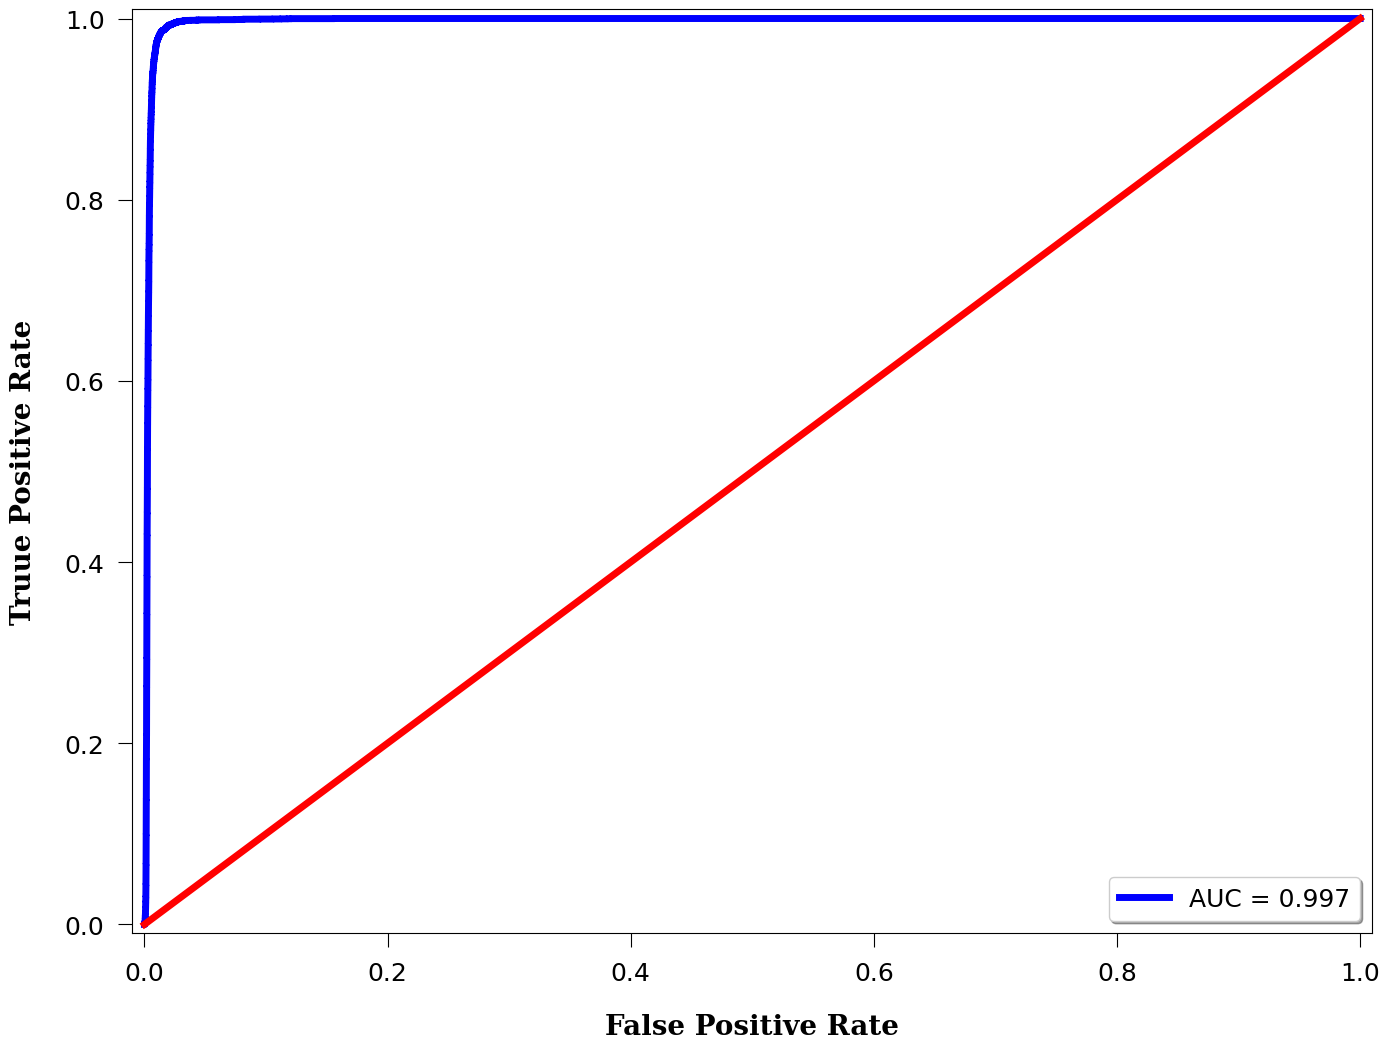

In [53]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.figure(figsize=(16,12))
plt.plot(false_pos_rate, true_pos_rate, color = 'blue', linewidth=5, linestyle = 'solid', label='AUC = %0.3f'% roc_auc)

plt.plot([0,1],[0,1], linewidth=5, color = 'red', linestyle = 'solid')

plt.xlabel('False Positive Rate', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.ylabel('Truue Positive Rate', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.tick_params(axis = 'x', labelsize = 18, pad = 10, length = 10)
plt.tick_params(axis = 'y', labelsize = 18, pad = 10, length = 10)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.legend(loc='best', ncol=1, fontsize=18, frameon=True, shadow=True, labelspacing = .5)
# plt.title('Receiver operating characteristic curve (ROC)')
# plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

